In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind
from tqdm import tqdm

# set random seed
np.random.seed(42)

## Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental principle in probability and statistics. It states that, given certain conditions, the sum (or average) of a large number of independent, identically distributed (i.i.d.) random variables approaches a normal (or Gaussian) distribution, no matter the shape of the original distribution. This result is the reason why the normal distribution appears in many contexts and is fundamental in inferential statistics.

The "certain conditions" are referred to:

* **Independence**: The random variables must be independent. This means that the outcome of one observation does not influence the outcome of another observation. In many practical scenarios, this assumption is satisfied by random sampling.

* **Identically Distributed**: The random variables should be identically distributed, often abbreviated as i.i.d. This means that each random variable has the same probability distribution as the others and the same parameters. In simpler terms, all variables come from the same "population".

* **Finite Mean and Variance**: Each of the random variables must have a finite mean 
($\mu$) and variance ($\sigma^2$). This means that extremely long-tailed distributions or distributions with no defined mean or variance may not conform to the CLT.

Let's run some simulations to see CLT in action, with samples drawing from different distributions.

In [ ]:
n_trials = 1000
n_samples = 100

In [ ]:
# sample means of a normal distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.normal(loc=1.0, scale=1.0, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

In [ ]:
# sample means of bernoulli distribution
sample_means = []
p = 0.6
for _ in range(n_trials):
    X_uniform = np.random.random(size=n_samples)
    X = [1 if x < p else 0 for x in X_uniform]
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

In [ ]:
# sample means binomial distribtuion
sample_means = []
for _ in range(n_trials):
    X = np.random.binomial(n=10, p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

In [ ]:
# sample means geometric distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.geometric(p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

## Point estimation and confidence interval

Point estimation refers to the process of using sample data to compute a single value, known as a statistic, which serves as the "best guess" or "best estimate" of an unknown population parameter (like the population mean or population proportion). For example, the sample mean is such a statistic, and the it is used as the point estimation (point estimate) of the population mean.

While point estimation gives a specific value as an estimate, it doesn't convey anything about the degree of certainty or possible margin of error associated with the estimate. This is where confidence intervals come into play.

A confidence interval provides a range of values, derived from the point estimate and the associated variability of the estimate, within which the true population parameter is expected to fall with a certain probability (confidence level).

Let's run some simulation to demonstrate the concept. 

Below, we already know the population parameter: the population mean. For the sake of demonstration, we will repeatly randomly sample from the population, for `n_trials` times. For each sampling, we draw 100 samples. Therefore, we will have 100 sample means. 

For each of the sample, we can construct the point estimation, and the confidence interval (CI). We will see that, there are chances, that the CI does not include the population mean.

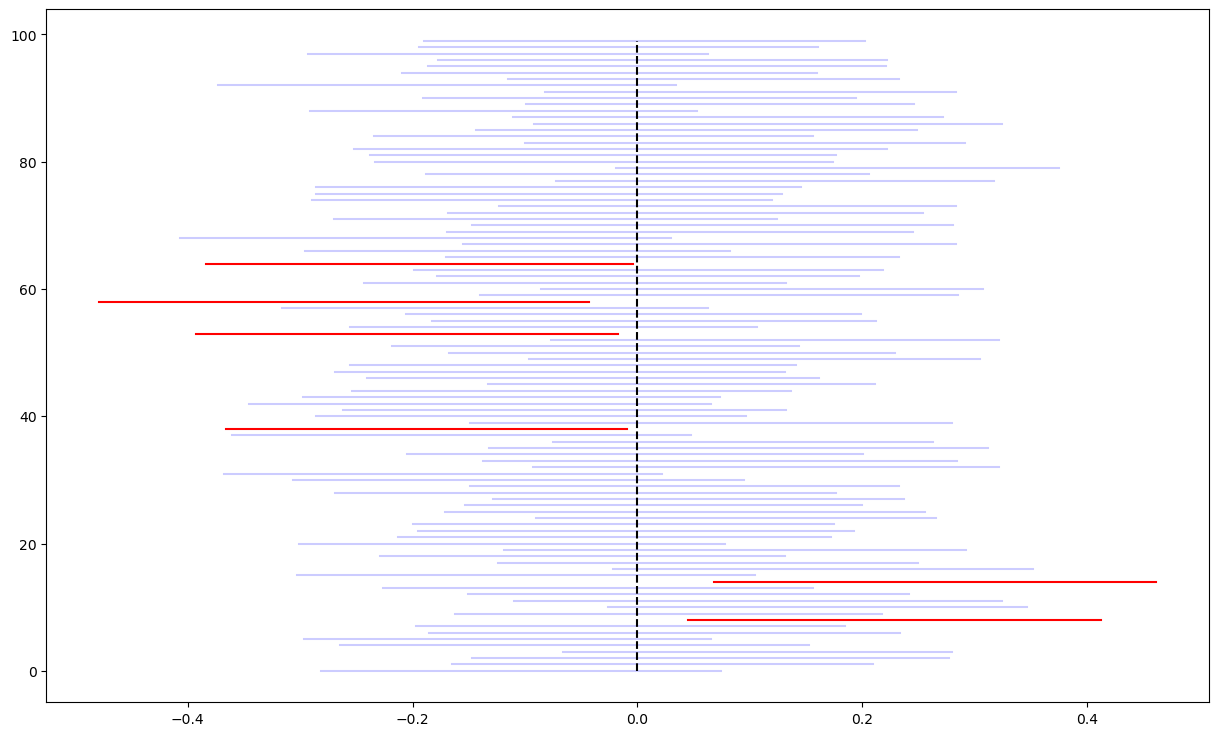

In [3]:
mu = 0  # population mean
sigma = 1

n_trials = 100
n_samples = 100
results = []
for i, _ in enumerate(range(n_trials)):
    X = np.random.normal(loc=mu, scale=sigma**0.5, size=n_samples)  # Sampling
    lower_bound = np.mean(X) - 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    upper_bound = np.mean(X) + 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    
    results.append((i, lower_bound, upper_bound))
    
plt.figure(figsize=(15, 9))
for i, lower, upper in results:
    if lower > mu or upper < mu:
        plt.plot([lower, upper], [i] * 2, color="red", alpha=1)
    else:
        plt.plot([lower, upper], [i] * 2, color="blue", alpha=0.2)
plt.plot([mu] * len(results), list(range(len(results))), "k--")
plt.show()